<a href="https://colab.research.google.com/github/mingjiez912/Machine_Learning_Lab/blob/main/HW4_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-6-18827c94bdeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-6-18827c94bdeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
ros.fit(X_train, y_train)
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
rus.fit(X_train, y_train)
under_X, under_y = rus.fit_resample(X_train, y_train)

oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [11]:
from sklearn.linear_model import LogisticRegression

In [32]:
ros_log_reg = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
ros_mod = ros_log_reg.fit(over_X, over_y)

rus_log_reg = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
rus_mod = rus_log_reg.fit(under_X, under_y)

smote_log_reg = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
smote_mod = smote_log_reg.fit(smote_X, smote_y)

# 4.) Test the three models

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
# Evaluate models using 5-fold cross-validation 
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
ros_results = cross_val_score(ros_mod, over_X, over_y, cv = kfold)
rus_results = cross_val_score(rus_mod, under_X, under_y, cv = kfold)
smote_results = cross_val_score(smote_mod, smote_X, smote_y, cv = kfold)

In [37]:
ros_results.mean()

0.8249287032377118

In [38]:
rus_results.mean()

0.8345232815964524

In [39]:
smote_results.mean()

0.9621591627630883

The SMOTE model performs the best.

# 5.) Which performed best in Out of Sample metrics?

In [25]:
from sklearn.metrics import classification_report

In [41]:
ros_y_pred = ros_mod.predict(X_test)
ros_report = classification_report(y_test, ros_y_pred)
print(ros_report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    166109
           1       0.03      0.75      0.06       607

    accuracy                           0.91    166716
   macro avg       0.51      0.83      0.51    166716
weighted avg       1.00      0.91      0.95    166716



In [43]:
rus_y_pred = rus_mod.predict(X_test)
rus_report = classification_report(y_test, rus_y_pred)
print(rus_report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166109
           1       0.03      0.76      0.06       607

    accuracy                           0.92    166716
   macro avg       0.52      0.84      0.51    166716
weighted avg       1.00      0.92      0.96    166716



In [45]:
smote_y_pred = smote_mod.predict(X_test)
smote_report = classification_report(y_test, smote_y_pred)
print(smote_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    166109
           1       0.13      0.73      0.21       607

    accuracy                           0.98    166716
   macro avg       0.56      0.85      0.60    166716
weighted avg       1.00      0.98      0.99    166716



The SMOTE model performs the best. 

# 6.) Pick two features and plot the two classes before and after SMOTE.

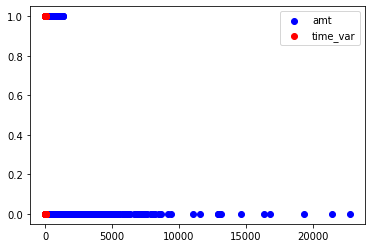

In [60]:
plt.scatter(X.amt, y, c = 'b', marker = 'o', label = 'amt')
plt.scatter(X.time_var, y, c = 'r', marker = 'o', label = 'time_var')
plt.legend(loc = 'upper right')
plt.show()

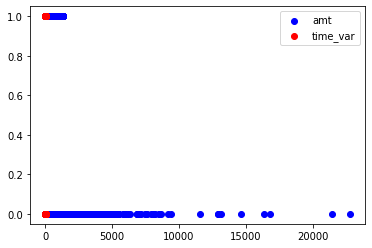

In [61]:
plt.scatter(smote_X.amt, smote_y, c = 'b', marker = 'o', label = 'amt')
plt.scatter(smote_X.time_var, smote_y, c = 'r', marker = 'o', label = 'time_var')
plt.legend(loc = 'upper right')
plt.show()